<a href="https://colab.research.google.com/github/mehrotrasan16/Keras-Deep-Learning/blob/02-FashionMNISTAutoKeras-Classification/A2_Q1_FashionMNISTAuto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import models,layers

train_data, test_data,  = tf.keras.datasets.fashion_mnist.load_data()


4423680/4422102 [==============================] - 0s 0us/step


In [2]:
train_images, train_labels = test_data
train_images.size, train_labels.size

(7840000, 10000)

In [3]:
test_images, test_labels = test_data
test_images.size, test_labels.size

(7840000, 10000)

In [4]:
# Normalize pixel values to be between 0 and 1
train_images,test_images  = train_images / 255.0, test_images / 255.0

In [5]:
train_images.shape[1:], test_images.shape[1:]

((28, 28), (28, 28))

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:

classes =(np.unique(train_labels))
classes

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [8]:
classnames = np.array(['T-shirt','Trouser','Pullover','Dress','Coat','Sandal','Shirt', 'sneaker', 'bag','ankle-boot'])
classnames

array(['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal',
       'Shirt', 'sneaker', 'bag', 'ankle-boot'], dtype='<U10')

In [9]:
classes = classes.reshape((-1,1))
classnames = classnames.reshape((-1,1))

In [10]:
arrayclass = np.hstack((classes,classnames))

In [11]:
ClassDistribution = pd.DataFrame(arrayclass,columns=['Class','Class-name'])
ClassDistribution

,Class,Class-name
0,0,T-shirt
1,1,Trouser
2,2,Pullover
3,3,Dress
4,4,Coat
5,5,Sandal
6,6,Shirt
7,7,sneaker
8,8,bag
9,9,ankle-boot


In [12]:
freqs = [list(train_labels).count(x) for x in classes]

In [13]:
ClassDistribution['Train Freq'] = freqs

In [14]:
ClassDistribution

,Class,Class-name,Train Freq
0,0,T-shirt,1000
1,1,Trouser,1000
2,2,Pullover,1000
3,3,Dress,1000
4,4,Coat,1000
5,5,Sandal,1000
6,6,Shirt,1000
7,7,sneaker,1000
8,8,bag,1000
9,9,ankle-boot,1000


In [15]:
test_freqs = [list(test_labels).count(x) for x in classes]

In [16]:
ClassDistribution['Test Freq'] = freqs

In [17]:
ClassDistribution

,Class,Class-name,Train Freq,Test Freq
0,0,T-shirt,1000,1000
1,1,Trouser,1000,1000
2,2,Pullover,1000,1000
3,3,Dress,1000,1000
4,4,Coat,1000,1000
5,5,Sandal,1000,1000
6,6,Shirt,1000,1000
7,7,sneaker,1000,1000
8,8,bag,1000,1000
9,9,ankle-boot,1000,1000


In [18]:
train_images[0].shape

(28, 28)

In [19]:
#INSERT YOUR MODEL CODE HERE
#YOU CAN ALSO CHANGE THE CODE BELOW TO COMPILE AND RUN THE MODEL

model = models.Sequential()
model.add(keras.layers.Reshape(input_shape=(28*28,), target_shape=(28, 28, 1))),
model.add(layers.Conv2D(32, kernel_size=(3,3), padding='same', activation='relu', input_shape=(28,28)))
model.add(layers.MaxPool2D(pool_size=(2,2)))
#model.add(layers.BatchNormalization(center=True, scale=False))
model.add(layers.Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
#model.add(layers.BatchNormalization(center=True, scale=False))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
#model.add(layers.BatchNormalization(center=True, scale=False))
model.add(layers.Dropout(0.50))
model.add(layers.Dense(10))


In [20]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=15, 
                    validation_data=(test_images, test_labels))

Epoch 1/15
313/313 [==============================] - 2s 5ms/step - loss: 0.7075 - accuracy: 0.7373 - val_loss: 0.4772 - val_accuracy: 0.8207
Epoch 2/15
313/313 [==============================] - 1s 4ms/step - loss: 0.4584 - accuracy: 0.8353 - val_loss: 0.3519 - val_accuracy: 0.8755
Epoch 3/15
313/313 [==============================] - 1s 4ms/step - loss: 0.3872 - accuracy: 0.8583 - val_loss: 0.3115 - val_accuracy: 0.8880
Epoch 4/15
313/313 [==============================] - 1s 4ms/step - loss: 0.3380 - accuracy: 0.8764 - val_loss: 0.2590 - val_accuracy: 0.9091
Epoch 5/15
313/313 [==============================] - 1s 4ms/step - loss: 0.2969 - accuracy: 0.8926 - val_loss: 0.2312 - val_accuracy: 0.9157
Epoch 6/15
313/313 [==============================] - 1s 4ms/step - loss: 0.2700 - accuracy: 0.9022 - val_loss: 0.2015 - val_accuracy: 0.9259
Epoch 7/15
313/313 [==============================] - 1s 4ms/step - loss: 0.2374 - accuracy: 0.9117 - val_loss: 0.1731 - val_accuracy: 0.9377
Epoch 

313/313 - 1s - loss: 0.0561 - accuracy: 0.9824


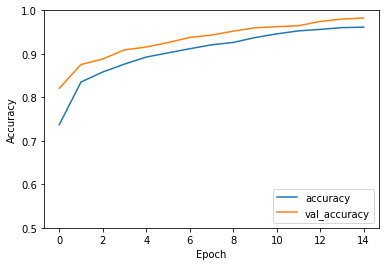

In [21]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [22]:
!pip3 install git+https://github.com/keras-team/keras-tuner.git@1.0.2rc1
!pip3 install autokeras

  Cloning https://github.com/keras-team/keras-tuner.git (to revision 1.0.2rc1) to /tmp/pip-req-build-us0b2qn7
  Running command git clone -q https://github.com/keras-team/keras-tuner.git /tmp/pip-req-build-us0b2qn7
  Running command git checkout -q 0fb69434a132093518e0e53d40020145ae192629
  Created wheel for keras-tuner: filename=keras_tuner-1.0.2rc1-cp36-none-any.whl size=85424 sha256=7127b79a19184c4373804639bf4c158c0b7e5d768ef3e9792693c97db7b19bca
  Stored in directory: /tmp/pip-ephem-wheel-cache-pdrwjnd5/wheels/af/c9/7c/6ea01f9753a5dd1484136b4cb7b33a0a7fba253e5c74ade5af
  Created wheel for terminaltables: filename=terminaltables-3.1.0-cp36-none-any.whl size=15356 sha256=3de59f6e922199b5b78ff12c0b1b40fb0b819fc0a008986253229839e2a36142
  Stored in directory: /root/.cache/pip/wheels/30/6b/50/6c75775b681fb36cdfac7f19799888ef9d8813aff9e379663e
Successfully built keras-tuner terminaltables
     |████████████████████████████████| 122kB 2.5MB/s 


In [23]:
import autokeras as ak

clf = ak.ImageClassifier(num_classes=10,
                         multi_label=False,
                         loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                         max_trials=5,
                         project_name='FashionMNISTAuto2')

checkpoint_filepath='weights.{epoch:02d}-{val_loss:.2f}.hdf5'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_acc',
    mode='max',
    save_best_only=True)

clf.fit(x=train_images,
        y=train_labels,
        epochs=10,
        callbacks=[model_checkpoint_callback],
        validation_data=(test_images,test_labels))




Trial 5 Complete [00h 11m 28s]
val_loss: 0.024123959243297577

Best val_loss So Far: 0.024123959243297577
Total elapsed time: 00h 37m 31s
INFO:tensorflow:Oracle triggered exit
Epoch 1/10
313/313 [==============================] - 68s 217ms/step - loss: 0.7358 - accuracy: 0.7598 - val_loss: 7.0206 - val_accuracy: 0.0637
Epoch 2/10
313/313 [==============================] - 67s 214ms/step - loss: 0.2785 - accuracy: 0.9155 - val_loss: 5.8844 - val_accuracy: 0.0957
Epoch 3/10
313/313 [==============================] - 67s 214ms/step - loss: 0.1404 - accuracy: 0.9663 - val_loss: 1.6457 - val_accuracy: 0.4734
Epoch 4/10
313/313 [==============================] - 67s 214ms/step - loss: 0.0614 - accuracy: 0.9929 - val_loss: 1.2372 - val_accuracy: 0.6053
Epoch 5/10
313/313 [==============================] - 67s 214ms/step - loss: 0.0255 - accuracy: 0.9995 - val_loss: 0.2552 - val_accuracy: 0.9111
Epoch 6/10
313/313 [==============================] - 67s 214ms/step - loss: 0.0122 - accuracy: 0.9

In [24]:
results = clf.predict(test_images)

In [34]:
results

array([[9],
       [2],
       [1],
       ...,
       [8],
       [1],
       [5]], dtype=uint8)

In [35]:
clf.evaluate(test_images,test_labels)

313/313 [==============================] - 16s 52ms/step - loss: 0.0142 - accuracy: 0.9967


[0.014244253747165203, 0.9966999888420105]

In [26]:
# Export as a Keras Model.
model = clf.export_model()

print(type(model))  # <class 'tensorflow.python.keras.engine.training.Model'>

<class 'tensorflow.python.keras.engine.functional.Functional'>


In [28]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
normalization (Normalization)   (None, 28, 28, 1)    3           input_1[0][0]                    
__________________________________________________________________________________________________
resizing (Resizing)             (None, 224, 224, 1)  0           normalization[0][0]              
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 224, 224, 3)  0           resizing[0][0]                   
                                                                 resizing[0][0]        

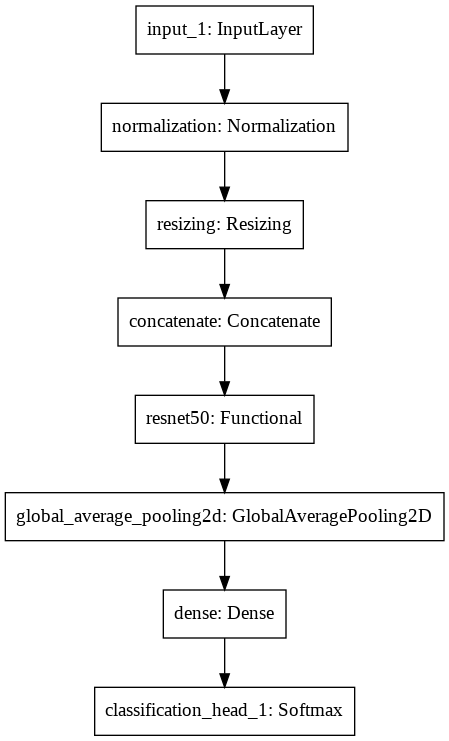

In [37]:
keras.utils.plot_model(model)

In [33]:
model.predict(test_images[:10])

array([[5.36337666e-06, 8.62840693e-07, 4.11687182e-07, 2.93821813e-06,
        7.29479689e-06, 6.33266336e-06, 3.66073300e-06, 2.79124197e-05,
        9.18178739e-06, 9.99935985e-01],
       [2.93442531e-06, 2.03341187e-06, 9.99988079e-01, 1.06017478e-06,
        2.27698752e-06, 3.74747344e-07, 1.97080993e-07, 1.28340190e-07,
        1.09041525e-06, 1.80774350e-06],
       [1.48013851e-05, 9.99835730e-01, 1.63119093e-05, 1.52215343e-05,
        8.07739070e-06, 8.08020377e-06, 6.34096359e-05, 1.01814712e-05,
        1.00937159e-05, 1.80779152e-05],
       [3.84386694e-05, 9.99170780e-01, 2.06080324e-04, 1.45502898e-04,
        3.91290887e-05, 4.58697359e-05, 2.15553446e-04, 5.98004881e-05,
        1.89440725e-05, 5.98802653e-05],
       [6.94708840e-04, 2.87673765e-06, 9.81556059e-06, 7.57593079e-05,
        1.56262686e-04, 1.48663025e-06, 9.99048889e-01, 3.32227023e-06,
        2.02098249e-06, 4.81838242e-06],
       [8.47328465e-06, 9.99830604e-01, 1.43232692e-05, 1.39418016e-05,
   